<a href="https://colab.research.google.com/github/Nick7900/permutation_test/blob/main/a1_between_subject_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perform permutation - Between-Subject Testing Tutorial
In this tutorial, we will learn how to use the ```between_subject_test``` function to perform permutation testing on between-subject data. The ```between_subject_test``` function is useful when you want to compare data between different subjects or groups. It is commonly used in experimental or observational studies to assess differences in data across different individuals.
Here are a few examples where ```between_subject_test``` testing can be useful:

- **Clinical Trials**: In clinical trials, researchers often compare the effectiveness of different treatments or interventions across a group of patients. ```between_subject_test``` can be used to assess whether there are significant differences between treatment groups.

- **Social Sciences**: In social sciences research, you may want to examine differences in behavior, attitudes, or outcomes between different groups of individuals (e.g., age groups, genders, cultural backgrounds). ```between_subject_test``` can help determine if there are statistically significant differences between these groups.

- **Neuroimaging Studies**: In neuroimaging studies, researchers may compare brain activation patterns between different participants. between_subject_test can be used to identify brain regions or networks that show significant differences between groups (e.g., healthy controls vs. patients).


## Permutation testing
Permutation testing is a resampling technique that involves random permutation of the observed data and comparing it to the observed effectto by generating a null distribution under the null hypothesis.

The null hypothesis states that there is no difference or association between variables of interest.

By comparing the observed test statistic with the distribution of test statistics under the null hypothesis, we can determine the p-value and assess the significance of the effect.

Permutation testing (non-parametric) is particularly useful when the underlying data distribution is unknown or violates certain assumptions required by parametric tests. It provides a flexible and robust alternative for hypothesis testing, especially in cases where parametric assumptions cannot be met.


## Step 0: Import Required Libraries
Let's begin by importing the necessary libraries for our analysis. We'll be using ```os```,```numpy```, ```pandas```, for loading the data and for data manipulation.

Furthermore, we will need to import the **GLHMM-package** as ```glhmm```:

If you dont have the **GLHMM-package** installed, then run the following command in your terminal:

```pip install --user git+https://github.com/vidaurre/glhmm```

To use the helper function ```my_functions``` you need to install the library's:
```
pip install mat73
```
```
pip install statsmodels
```
```
pip install tqdm
```

When using **Google Colab** we need to import the following libraries, so we can load the data of interest

```
!pip install requests
!pip install gdown
```



In [1]:
!pip install mat73
!pip install statsmodels
!pip install tqdm
!pip install requests
!pip install gdown

## Download the GLHMM package

In [2]:
!git clone https://github.com/vidaurre/glhmm
%cd glhmm

Cloning into 'glhmm'...
remote: Enumerating objects: 863, done.
remote: Counting objects: 100% (154/154), done.
remote: Compressing objects: 100% (113/113), done.
remote: Total 863 (delta 73), reused 65 (delta 40), pack-reused 709
Receiving objects: 100% (863/863), 12.61 MiB | 18.13 MiB/s, done.
Resolving deltas: 100% (506/506), done.
/content/glhmm


### Import packages

In [4]:
import os
import numpy as np
import pandas as pd
from glhmm import glhmm
import requests
import gdown

### Load Helper function

In [5]:
%cd ..
# Import helper function
# Get the raw github file
url = 'https://raw.githubusercontent.com/Nick7900/permutation_test/main/helper_functions/my_functions.py'
r = requests.get(url)
# Save the function to the directory
with open("my_functions.py","w") as f:
  f.write(r.text)

/content


### Load Permutationt testing functions

In [9]:
# Import helper function
# Get the raw github file
url = 'https://raw.githubusercontent.com/Nick7900/permutation_test/main/helper_functions/permutation_test.py'
r = requests.get(url)
# Save the function to the directory
with open("permutation_test.py","w") as f:
  f.write(r.text)

## Step 1: Loading Data Files
First, we need to load data files into our Python environment.
We will be working with two data files **data_measurement.npy** and **gamma.npy**.

These files contain measurement data and corresponding gamma values estimated from a trained ```glhmm``` model, respectively.

# Load directly from google drive
Remove the text **file/d/** from the link and replace it with **uc?id=**

Now remove the section after the file ID, including **/view** and replace it with **&export=download** in place of the text you have removed

In [23]:
# Define the folder and file names
folder_name = ""
# data_behavioral
url = "https://drive.google.com/uc?id=1Dac8F1iQTPA3rqjR6qsQN2L14VqMxsA4&export=download"
gdown.download(url, quiet=False)
# data_measurement_file
url = "https://drive.google.com/uc?id=1dBlUk_ecvkCQILZCSCcreMJ71vOvQ54P&export=download"
gdown.download(url, quiet=False)
# data_gamma_file
url = "https://drive.google.com/uc?id=1UkDPbepluacv-1ozk8RD25Yo25u0TOw_&export=download"
gdown.download(url, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1Dac8F1iQTPA3rqjR6qsQN2L14VqMxsA4&export=download
To: /content/data_behavioral.npy
100%|██████████| 1.09k/1.09k [00:00<00:00, 1.01MB/s]
Downloading...
From: https://drive.google.com/uc?id=1dBlUk_ecvkCQILZCSCcreMJ71vOvQ54P&export=download
To: /content/data_measurement.npy
100%|██████████| 7.20M/7.20M [00:00<00:00, 103MB/s]
Downloading...
From: https://drive.google.com/uc?id=1UkDPbepluacv-1ozk8RD25Yo25u0TOw_&export=download
To: /content/gamma.npy
100%|██████████| 432k/432k [00:00<00:00, 93.9MB/s]


'gamma.npy'

In [24]:
data_behavioral_file = 'data_behavioral.npy'
data_measurement_file = 'data_measurement.npy'
data_gamma_file = 'gamma.npy'

# Load behavioral data
file_path = os.path.join(folder_name, data_behavioral_file)
data_behavioral = np.load(file_path)

# Load measurement data
file_path = os.path.join(folder_name, data_measurement_file)
data_measurement = np.load(file_path)

# Load gamma data
file_path = os.path.join(folder_name, data_gamma_file)
data_gamma = np.load(file_path)


### Step 1.1 : Look at the data

Now we can look at the data structure.

What we can see here is that ```data_measurement =[60, 300, 50]```. \
What the data really contains are 60 subject and each subject has been measured of a period of time(T) for 300 timestamps and 50 parcellations over the brain.

For the corresponding 60 subjects, we got ```data_behavioral =[60,2]```, which are **behavioral** measurement of each subjects *sex* and *age*.

When we look at ```data_gamma =[18000, 3]```. The gamma measurement are concatenated for every timepoint for each subject 18000 (60 by 300). We got 3 columns and each represents the 3 different states at each timepoint per subject.


In [25]:
print(f"Data dimension of data_measurement: {data_measurement.shape}")
print(f"Data dimension of data_behavioral: {data_behavioral.shape}")
print(f"Data dimension of data_gamma: {data_gamma.shape}")

Data dimension of data_measurement: (60, 300, 50)
Data dimension of data_behavioral: (60, 2)
Data dimension of data_gamma: (18000, 3)


## Step 2: Data Preparation

Before performing permutation testing, we need to preprocess the data and create appropriate datasizes for analysis.

When performing permutation testing on the whole time series we will calculate the **Fractiona Occupancy**

### Fractional Occupancy (FO)
The Fractional Occupancy (FO) is a measure commonly used in a Hidden Markov Model (HMM) to quantify the amount of time spent in each state. In the context of HMMs, the FO represents the expected fraction of time spent in each hidden state.

The **FO** of each state is calculated based on the state probability time series (Gamma) generated by the HMM. The Gamma matrix represents the posterior probabilities of the hidden states given the observed data.

By calculating the **FO**, we can  gain insights into the relative importance or prevalence of each hidden state over time. It can help in understanding the dynamics of the underlying process modeled by the **HMM**.


### Calculate indices
Before we can calculate **FO** of the **gamma's** we need to specify the indices in the concatenated timeseries corresponding to the beginning and end of individual subjects/sessions in the shape ```[n_subjects, 2]```.

In [26]:
from my_functions import get_timestamp_indices
#Generate indices of the timestamps for each subject in the data.
n_s, n_timepoints, n_features =data_measurement.shape # [60, 300, 50]
idx_time =get_timestamp_indices(n_timepoints,n_s)
# Visualize the first 10 timepoints
idx_time[:10]

array([[   0,  300],
       [ 300,  600],
       [ 600,  900],
       [ 900, 1200],
       [1200, 1500],
       [1500, 1800],
       [1800, 2100],
       [2100, 2400],
       [2400, 2700],
       [2700, 3000]])

### Calculate Fractional Occupancy (FO)
Now that we got the indices we can calculate FO

In [27]:
# Calculate FO
FO =glhmm.utils.get_FO(data_gamma,idx_time)

# Run Between-Subject Testing
Now that we have the data prepared for the analysis we will show how to perform between-subject testing using the ```between_subject_test``` function. We will use an example dataset consisting of **fractional occupancy measurements** and corresponding **behavioral measurements**. Like previous stated, the behavioral measurements include information about the subjects' sex and age.

To make the jupyter notebook consisten with the functions we will define **fractional occupancy measurements** to be the input data (```X_data```) and the **behavioral measurements** to be the design matrix (```D_data```)

In [28]:
X_data = FO.copy()
D_data = data_behavioral.copy()
print('X_data shape:', X_data.shape)
print('D_data shape:', D_data.shape)

X_data shape: (60, 3)
D_data shape: (60, 2)


The ```X_data``` array has a shape of (60, 3), indicating 60 time points and 3 fractional occupancy measurements. The ```D_data``` array has a shape of (60, 2), indicating 60 time points and 2 behavioral measurements (sex and age).

## Step 3: Permutation testing - between subject testing


The ```between_subject_test``` function is designed to perform permutation tests on between subject. It utilizes various helper functions to handle the permutation generation, and statistical calculations. The main purpose of this function is to determine the statistical significance of observed patterns in the data by generating random permutations and comparing the results.


In [29]:
# import between_subject_test
from permutation_test import between_subject_test # This function should just be in the GLHMM package

### Parameters
The ```between_subject_test``` function accepts the following parameters:

* X_data (ndarray): Input data array of shape that can be either a 2D array or a 3D array. For 2D array, it got a           shape of (n_ST, n_features). For a 3D array,it got a shape (n_timepoints, n_ST, n_features). Where  n_ST = number of subjects or trials

* D_data (ndarray):             The dependent-variable or Design-matrix that can be either a 2D array or a 3D array. For 2D array, it got a           shape of (n_ST, n_features). For a 3D array,it got a shape (n_timepoints, n_ST, n_features). Where  n_ST = number of subjects or trials.
* idx_data (ndarray): It can take index data of shape (n_trials, 2) indicating start and end indices of trials or an 1D array of shape (n_ST,) where the indices are defined for each subject/trial.                                   Required if exchangeable=True. Defaults to None.   
* method (str): Method for performing permutation test for regression coefficients or permutation with correlation
* Nperm (int): Number of permutations to perform (default: 1000).
* confounds (numpy.ndarray or None): The confounds array (default: None).
* exchangeable (bool, optional): Flag indicating whether to perform exchangeable permutation between subjects. (default: False)
* participants (numpy.ndarray, optional): Indices of subjects/participants. Required if exchangeable=True. (default: False)
            


### Returns
The ```between_subject_test``` function returns two ndarrays:
* pval (numpy.ndarray): Array of p-values of shape (n_timepoints, n_features).
* corr_pval (numpy.ndarray): Array of correlation p-values of shape (n_timepoints, n_features, n_predictions).

### 3.1: Example of usage - Regression
We will now demonstrate how to use the ```between_subject_test``` function by performing permutation test for regression coefficients


In [30]:
# Set the parameters for between-subject testing
method = "regression"
Nperm = 1000
test_statistic_option=True


# Perform between-subject testing
pval, test_statistic_list  =between_subject_test(X_data, D_data, method=method,Nperm=Nperm,test_statistic_option=test_statistic_option)
pval

performing permutation testing for whole data


100%|██████████| 1000/1000 [00:00<00:00, 28518.32it/s]


array([[0.7002997 , 0.78221778, 0.51448551]])

### Step 3.1: P-value correction

In [31]:
from my_functions import *
alpha = 0.05
p_values_corrected,rejected_corrected  =pval_test(pval, alpha =alpha)
# Identify significant results after correction
significant_indices_corrected = np.where(p_values_corrected < alpha)

# Print the significant results
print("Corrected P-value:", p_values_corrected)
print("Significant Time Points (Thresholding + Correction):", significant_indices_corrected)

Corrected P-value: [[0.78221778 0.78221778 0.78221778]]
Significant Time Points (Thresholding + Correction): (array([], dtype=int64), array([], dtype=int64))


### Step 3.1: Visualize the p-values using heatmap
 Visualize the results by creating some plotting functions. Here's an example of how to plot the p-values

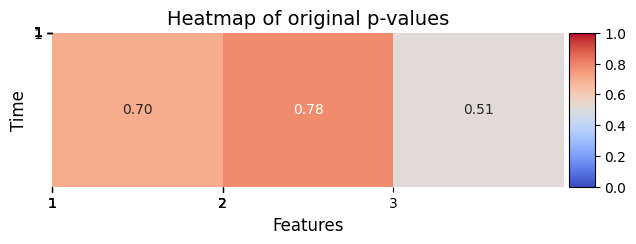

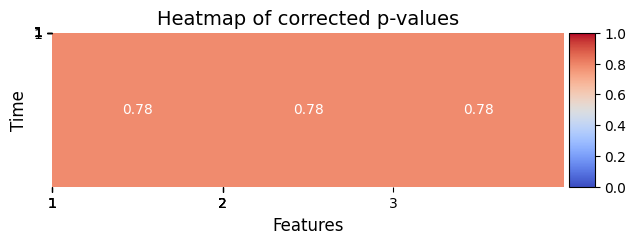

In [32]:
# Plot p-values
plot_heatmap(pval,method, title_text ="Heatmap of original p-values",figsize=(7, 2))

plot_heatmap(p_values_corrected,method, title_text ="Heatmap of corrected p-values",figsize=(7, 2))

### Step 3.1: Interpret Results
After running the permutation test, we can interpret the results.

- The ```p_values``` variable contains the p-values for the regression coefficients of each feature in ```X_data = [n_subject, n_feature]``` for the whole timerseries.

The p-value represents the probability of observing a test statistic as extreme as (or more extreme than) the observed statistic, assuming the null hypothesis is true.




### Step 3.1: Conclusion

The p-values in permutation with regression show how significant the regression coefficients between every feature and the behavioral measures are.
The more strongly the feature is showed to be statistically linked with the behavioral measurements, the lower the p-value must be.
Based on these p-values and the significance level chosen (alpha=0.05), it shows that we fail to reject the null hypothesis, indicating that there is no strong evidence of a significant relationship between the feature and the behavioral measurement.


### 3.2: Example of usage - Correlation
We will now demonstrate how to use the ```between_subject_test``` function by performing permutation test for correlation coefficients


In [33]:
# Set the parameters for between-subject testing
method = "correlation_com"
Nperm = 1000

# Perform between-subject testing
pval, corr_coef = between_subject_test(X_data, D_data, method=method, Nperm=Nperm)

performing permutation testing for whole data


100%|██████████| 1000/1000 [00:07<00:00, 141.51it/s]


### 3.2: P-value correction

In [34]:
from my_functions import *
alpha = 0.05
p_values_corrected,rejected_corrected  =pval_test(pval, alpha =alpha)
# Identify significant results after correction
significant_indices_corrected = np.where(p_values_corrected < alpha)

# Print the significant results
print("Corrected P-value:", p_values_corrected)
print("Significant Time Points (Thresholding + Correction):", significant_indices_corrected)

Corrected P-value: [[[0.9000999  0.81278721]
  [0.81278721 0.81278721]
  [0.81278721 0.81278721]]]
Significant Time Points (Thresholding + Correction): (array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))


### 3.2: Visualize the p-values using heatmap
 Visualize the results by creating some plotting functions. Here's an example of how to plot the correlation coefficients and p-values.

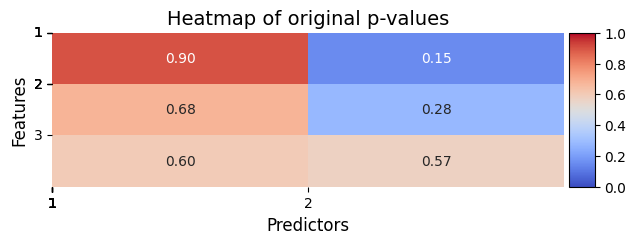

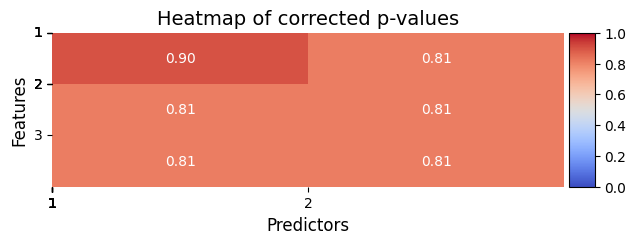

In [35]:
# Plot p-values
plot_heatmap(pval[0,:],method, title_text ="Heatmap of original p-values",figsize=(7, 2))

plot_heatmap(p_values_corrected[0,:],method, title_text ="Heatmap of corrected p-values",figsize=(7, 2))

Heat map for correlation

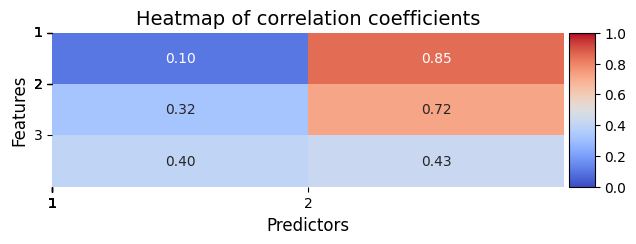

In [36]:
plot_heatmap(corr_coef[0,:], method=method, title_text="Heatmap of correlation coefficients",figsize=(7, 2))

### Step 3.2: Interpret Results
After running the permutation test using **correlation**, we can interpret the results.

- The ```p_values``` variable contains the p-values for the correlation coefficients betweem each measurement feature (3 states calculated from the GLHMM) in ```X_data = [n_subject, n_feature]``` and the behavioral measurements (sex, age) in ```D_data=[n_subject,n_predictors]```for the whole timeseries. The lower the p-value, the stronger the evidence that the feature is significantly correlated with the behavioral measurements.

- If a p-value is less than the chosen significance level (```alpha=0.05```), you can reject the null hypothesis and conclude that there is a significant correlation between the measured feature and the behavioral measurement.

- If a p-value is greater than the significance level, you fail to reject the null hypothesis, indicating that there is no strong evidence of a significant correlation between the measured feature and the behavioral measurement.







### 3.2: Conclusion
The p-values in permutation with correlation show how significant the correlation coefficients between every HMM states and the behavioral measures (sex, age) are. The more strongly the feature is showed to be statistically linked with the behavioral measurements, the lower the p-value must be.
Based on these p-values and the significance level chosen (alpha=0.05), it appears that none of the correlation coefficients are statistically significant after correction..... (maybe the correction is too conservative?)
